# HRV Monitor Learning Algorithm Metrics

In [69]:
import json
import numpy as np
import matplotlib.pyplot as plt

# open our json output file
with open('./export_data/export.json') as data_file:
    metric_data = json.load(data_file)

lr_error = np.array(metric_data["error"])
lr_samples = np.array(metric_data["samples"])
lr_labels = np.array(metric_data["isStressed"])

# we must have isStressed that match up to our samples
assert len(lr_labels) == len(lr_samples)

num_samples = len(lr_samples) # used in x-axis of feedback plot
num_errors = len(lr_error) # used in x-axis of error plot

# helper used to map samples -> hrv averages
def map_hrv_store_to_avg_hrv(hrv_store):
    avg_hrv_store = lambda a: np.mean(a)
    return avg_hrv_store(hrv_store)

## Average HRV to Stress Level Plot

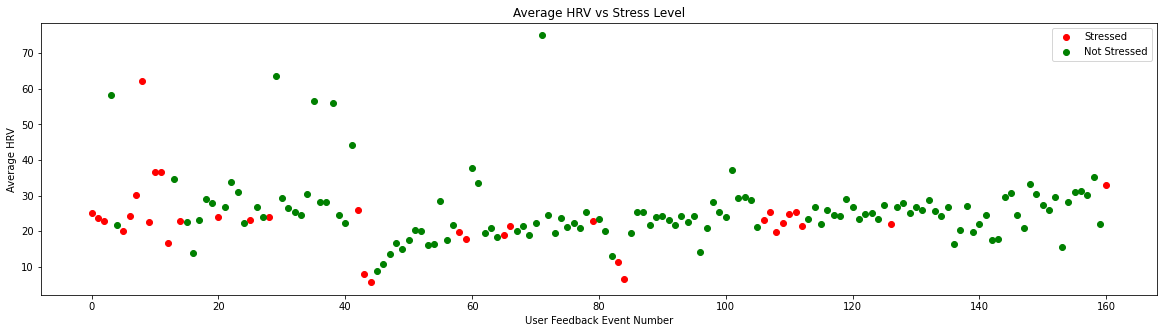

In [70]:
# y-vals for sample plot
y_avg_hrvs = list(map(lambda a: map_hrv_store_to_avg_hrv(a), lr_samples))
assert len(y_avg_hrvs) == len(lr_labels)

pos_stress_samples = []
neg_stress_samples = []

for i, (sample, label) in enumerate(zip(y_avg_hrvs, lr_labels)):
    if label == 1:
        pos_stress_samples.append((i, sample))
    else:
        neg_stress_samples.append((i, sample))

# plot pos/neg stress events
plt.scatter(*zip(*pos_stress_samples), color='red')
plt.scatter(*zip(*neg_stress_samples), color='green')

# naming the x-axis
plt.xlabel('User Feedback Event Number')
  
# naming the y-axis
plt.ylabel('Average HRV')

ax = plt.gca()
ax.legend(['Stressed', 'Not Stressed'])
  
# gives a title to the Graph
plt.title('Average HRV vs Stress Level')

# increase size of plot
plt.rcParams["figure.figsize"] = (20, 5)

plt.savefig("./figs/hrv_vs_stress.png")

plt.show()

## Error Plot

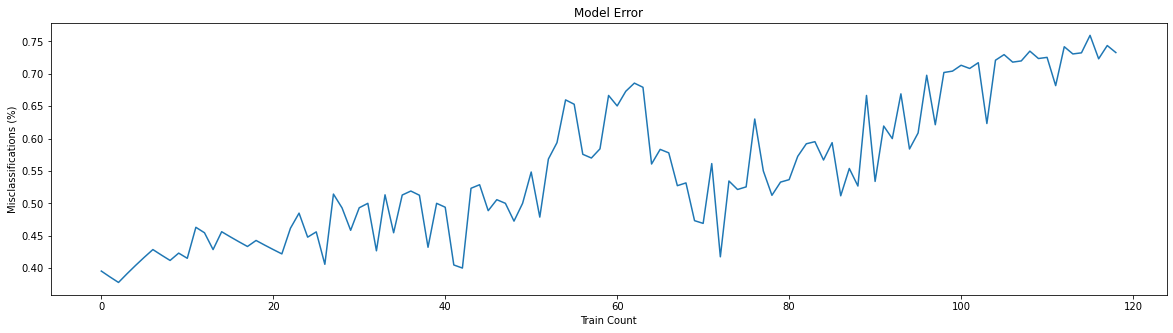

In [74]:
# y-vals for sample plot
y_error = lr_error

# x-axis for error
x_error = np.arange(num_errors)

# plot the error
plt.plot(x_error, y_error)

# naming the x-axis
plt.xlabel('Train Count')
  
# naming the y-axis
plt.ylabel('Misclassifications (%)')
  
plt.title('Model Error')
plt.rcParams["figure.figsize"] = (20, 5)

plt.savefig("./figs/error_fig.png")

plt.show()